### A wise man once said--never let a that pesky _data_ get in the way of a good story...
Your goal is to generate some analysis showing a statistically and/or visually convincing connection between two completely unrelated columns of numbers. Here are some techniques to try:
* **Apply filters**: Try lots of "preprocessing"/subselection techniques until you find something that makes it appear signification (e.g. we excluded rows where "price range of random vegan restaurant" was NaN). Even better, iterate over all possible subsets of data until you find something that looks significant, then retroactively justify that choice of filters. :)
* **Try lots of different summary stats**: Means not looking significant? Have you tried medians? Modes? With/without outliers? Smoothing? Interpolations? Surely something will illuminate the underlying "true" trend you know is there. 
* **Iterate through plot types**: Just because that scatter plot looks utterly random doesn't mean that its utterly random. You can try different binning/aggregation techniques and try a bar plot? So many figures, one is bound to work in your favor. And worst comes to worst, you can maybe finagle the axis ranges a bit and make it work for you.
* **Introduce other variables**: Your two columns alone might not seem meaningful, but maybe they are meaningful in combinations with other random variables? Maybe the interaction term of wine quality and disney stock trade volume is in fact a signficant predictor of the length of that random book review. Why souldn't it be?


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import codecs
import random
import numpy as np
from math import sqrt

categorical_vars = ['random_year', 'random_day', 'name_of_random_vegan_restaurant', 'city_of_random_vegan_restaurant', 'pricerange_of_random_vegan_restaurant', 'random_basketball_team', 'region_of_random_team', 'text_of_random_book_review']
continuous_vars = ['quality_of_some_random_wine', 'ph_of_some_random_wine', 'density_of_some_random_wine', 'volume_disney_stock_traded_on_day_of_year', 'seed_of_random_team_in_year']

data = pd.read_csv(codecs.open('total_bs_data.csv', encoding='utf-8'))
c1 = random.choice(continuous_vars)
c2 = random.choice([c for c in continuous_vars if not c == c1] + categorical_vars)
print("Show some (any) relationship between:\n%s\nand\n%s"%(c1, c2))


Show some (any) relationship between:
ph_of_some_random_wine
and
name_of_random_vegan_restaurant


## Example of filtering data

In [51]:
print(data.shape)
# creates a mask to sub-select rows
boolean_mask = data['random_year'] >= 2005 
# applies that mask
filtered_data = data[boolean_mask]
print(filtered_data.shape)
print(filtered_data['random_year'].head())

# group-by and aggregate (like in sql)
# get the average ph by year
by_year = data.groupby('random_year').agg({'ph_of_some_random_wine': 'mean'})
by_year.head()

(2001, 13)
(817, 13)
1    2010
2    2009
3    2014
4    2015
7    2011
Name: random_year, dtype: int64


,ph_of_some_random_wine
random_year,
1985,3.220794
1986,3.239683
1987,3.230847
1988,3.230566
1989,3.205455


## Example of plotting data

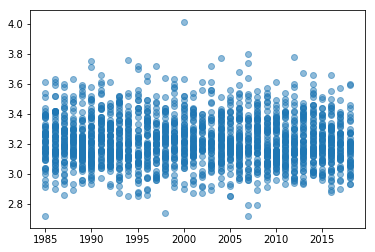

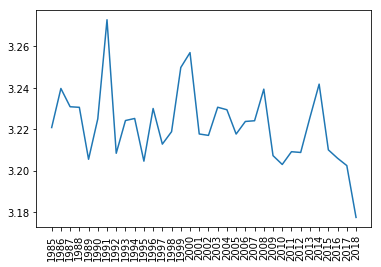

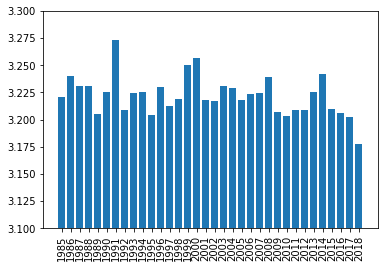

In [61]:
# scatter plot
# alpha controls transparency, helps for visualizing crowded data points
plt.scatter(data['random_year'], data['ph_of_some_random_wine'], alpha=0.5)
plt.show()

# line plot
rows, columns = by_year.shape
years = by_year.index.values
plt.plot(np.arange(rows), by_year['ph_of_some_random_wine'])
plt.xticks(np.arange(rows), years, rotation='vertical')
plt.show()

# bar plot
plt.bar(np.arange(rows), by_year['ph_of_some_random_wine'])
plt.ylim(3.1, 3.3)
plt.xticks(np.arange(rows), years, rotation='vertical')
plt.show()

## Example of running significance tests

In [67]:
## Pearson Correlation
correlation_coef, p_val = scipy.stats.pearsonr(data['random_year'], data['ph_of_some_random_wine'])
print("Correlation = %.03f; p-value=%.03f"%(correlation_coef, p_val))

## Means with confidence intervals
data2015 = data[data['random_year'] == 2015 ]
n, (minimum, maximu), mean, variance, skew, kurtosis = scipy.stats.describe(data2015['ph_of_some_random_wine'])
print("Mean: %.02f"%mean)
margin_of_error = 1.96 * sqrt(variance/n)
print("Confidence Interval: %.02f - %.02f"%(mean-margin_of_error, mean+margin_of_error))

## t-test for difference in means
data2016 = data[data['random_year'] == 2016 ]
test_stat, p_val = scipy.stats.ttest_ind(data2015['ph_of_some_random_wine'], data2016['ph_of_some_random_wine'])
print("T = %.03f; p-value=%.03f"%(test_stat, p_val))

Correlation = -0.040; p-value=0.073
Mean: 3.21
Confidence Interval: 3.17 - 3.25
T = 0.150; p-value=0.881
